In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
test_data = (pd.read_csv('/content/drive/My Drive/Test/HW4/4/Test_Data.csv', header = None)).to_numpy()
test_label = (pd.read_csv('/content/drive/My Drive/Test/HW4/4/Test_Labels.csv', header = None)).to_numpy()
train_data = (pd.read_csv('/content/drive/My Drive/Test/HW4/4/Train_Data.csv', header = None)).to_numpy()
train_label = (pd.read_csv('/content/drive/My Drive/Test/HW4/4/Train_Labels.csv', header = None)).to_numpy()

train_data = Normalization(train_data)
test_data = Normalization(test_data)

In [167]:
def Normalization(data):
  data -= np.mean(data, axis = 0)
  data /= np.std(data, axis = 0)
  return data

In [148]:
def Mean(data, label):
  N = (data.shape)[1]
  mu = np.zeros((10, N))
  for i in range(10):
    indxs = (np.where(label == i))[0]
    for j in indxs:
      mu[i] += data[j]
    mu[i] /= (indxs.shape)[0]
  return mu

In [169]:
def Covariance(data, label, mu):
  a = 0.7
  N = (data.shape)[1]
  cov = np.zeros((10, N, N))
  for i in range(10):
    indxs = (np.where(label == i))[0]
    for j in indxs:
      x = np.array([data[j] - mu[i]])
      cov[i] += np.matmul(np.transpose(x), x)
    cov[i] /= ((indxs.shape)[0] - 1)
    cov[i] = (1 - a) * cov[i] + a * np.trace(cov[i]) * np.identity(N) / N
  return cov

In [170]:
def Calculate_P(x, cov, mu):
  n = (x.shape)[0]
  P = np.zeros(10)
  for i in range(10):
    a = np.array([x - mu[i]])
    b = np.matmul(np.linalg.inv(cov[i]), np.transpose(a))
    P[i] = np.exp((-1/2 * np.matmul(a, b))) / (np.power(2*np.pi, n/2) * np.sqrt(np.linalg.det(cov[i])))
  return np.argmax(P)

In [138]:
def Train(data, label):
  mu = Mean(data, label)
  cov = Covariance(data, label, mu)
  return mu, cov

In [184]:
def Test(data, label, mu, cov):
  count = 0
  N = (data.shape)[0]
  M = (data.shape)[1]
  confusion_matrix = np.zeros((10, 10))
  predicted_labels = np.zeros((N, 1))
  for i in range(N):
    predicted_labels[i] = Calculate_P(data[i], cov, mu)
    confusion_matrix[int(label[i])][int(predicted_labels[i])] += 1
    if (label[i] == predicted_labels[i]):
      count += 1
  print("accuray is:", count/N)
  ax = plt.axes()
  sns.heatmap(confusion_matrix, annot = True, fmt = '.0f' , ax = ax)
  ax.set_title('without prior knowledge')
  plt.show()
  return

accuray is: 0.7968571428571428


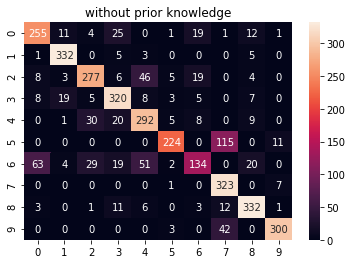

In [185]:
mu, cov = Train(train_data, train_label)
Test(test_data, test_label, mu, cov)

With Prior Knowlege

In [187]:
def Prior_Calculation(label):
  N = (label.shape)[0]
  p = np.zeros(10)
  for i in range(N):
    p[int(label[i])] += 1
  p /= N
  return p

In [188]:
def Calculate_P(x, cov, mu, p):
  n = (x.shape)[0]
  P = np.zeros(10)
  for i in range(10):
    a = np.array([x - mu[i]])
    b = np.matmul(np.linalg.inv(cov[i]), np.transpose(a))
    P[i] = np.exp((-1/2 * np.matmul(a, b))) / (np.power(2*np.pi, n/2) * np.sqrt(np.linalg.det(cov[i]))) * p[i]
  return np.argmax(P)

In [189]:
def Test(data, label, mu, cov, p):
  count = 0
  N = (data.shape)[0]
  M = (data.shape)[1]
  confusion_matrix = np.zeros((10, 10))
  predicted_labels = np.zeros((N, 1))
  for i in range(N):
    predicted_labels[i] = Calculate_P(data[i], cov, mu, p)
    confusion_matrix[int(label[i])][int(predicted_labels[i])] += 1
    if (label[i] == predicted_labels[i]):
      count += 1
  print("accuray is:", count/N)
  ax = plt.axes()
  sns.heatmap(confusion_matrix, annot = True, fmt = '.0f' , ax = ax)
  ax.set_title('with prior knowledge')
  plt.show()
  return

accuray is: 0.7968571428571428


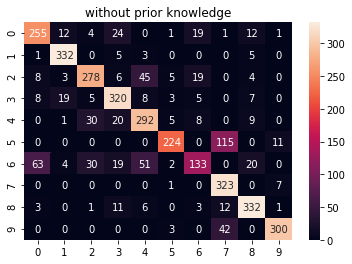

In [190]:
mu, cov = Train(train_data, train_label)
p = Prior_Calculation(train_label)
Test(test_data, test_label, mu, cov, p)